## READ THE CLEANED DOC

In [1]:
import pandas as pd

In [2]:
final = pd.read_csv("finalmerged.csv")
final.head()

,id,final
0,etfi0m,americas new drinking problem trump administra...
1,etouq6,trumps gutting environmental rules pushing us ...
2,etp02h,greta thunberg brushes mockery yous finance ch...
3,etpv53,it crisis change six guardian language changes...
4,etsaxl,future worse thought


In [3]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67985 entries, 0 to 67984
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      67985 non-null  object
 1   final   67985 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [4]:
duplicate = final[final["final"].duplicated()]
print(len(duplicate))
duplicate.head()

1853


,id,final
79,f1kvp7,ecofriendly reusable childresistant containers
89,f2h7mj,green
127,f78tvk,green
148,f95n5u,green
159,f9xguw,please fill quick survey enhance understanding...


In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(final)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df = final.copy()

In [11]:
df.shape

(67985, 2)

In [16]:
df = df.loc[df["final"] != "agreed"]
df = df.loc[df["final"] != "thanks"]
df = df.loc[df["final"] != "thank you"]
df = df.loc[df["final"] != "thank"]
df = df.loc[df["final"] != "thank much"]
df = df.loc[df["final"] != "yes"]
df = df.loc[df["final"] != "exactly"]
df.shape

(67837, 2)

In [12]:
freefromdeleted= final[final["final"]=="exactly"].dropna()
print(freefromdeleted.shape)
freefromdeleted.head()

(19, 2)


,id,final
6545,oxc7x1,exactly
15320,h809x4j,exactly
15391,h8tmfc3,exactly
18389,flln9fk,exactly
19882,foutqmd,exactly


In [13]:
freefromdeleted.loc[6545]

id        oxc7x1
final    exactly
Name: 6545, dtype: object

In [14]:
df.loc[6545]

id        oxc7x1
final    exactly
Name: 6545, dtype: object

In [17]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## TEXT ANALYSIS

In [20]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [19]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

C:\Users\Naim Cavin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Naim Cavin\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


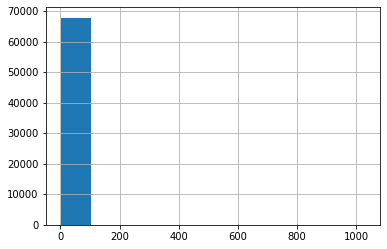

In [21]:
plot_word_length_histogram(df["final"])

In [34]:
corpus=[]
new= df["final"].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

In [35]:
from collections import defaultdict
dic=defaultdict(int)

**We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.**

In [36]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

In [37]:
x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

<AxesSubplot:>

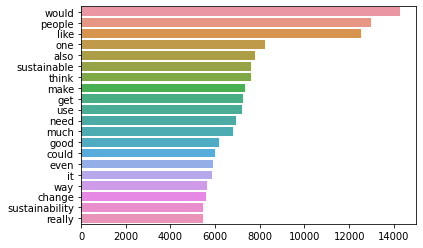

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=y,y=x)

In [51]:
#del corpus
#del new

In [54]:
df1 = df.copy()

In [55]:
df1.shape

(67837, 2)

In [56]:
import neattext.functions as nfx

In [1]:
df1["final"] = df1["final"].apply(nfx.remove_stopwords)


NameError: name 'df1' is not defined

In [58]:
corpus=[]
new= df1["final"].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

In [61]:
x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

<AxesSubplot:>

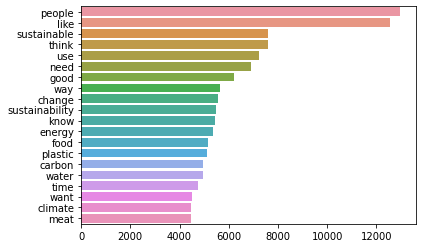

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=y,y=x)

***In the previous notebook, we removed stopwords by using NLTK instead of NEATTEXT. However, what we see now motivates me to use NEATTEXT for stopwords because two bar charts above demonstrates that NLTK doesn't remove the words such as "would, one, could, even, it" and this impacts the importance of word hierarchy.***

### Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [45]:
from nltk.util import ngrams

In [46]:
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

To build a representation of our vocabulary we will use Countvectorizer. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form.

In [47]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [63]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

### BI-gram

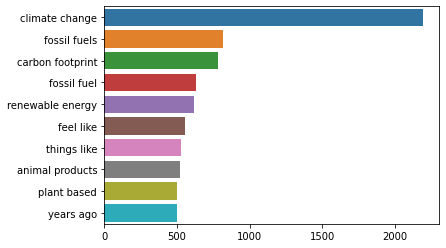

In [65]:
plot_top_ngrams_barchart(df1["final"],2)

### TRI-gram

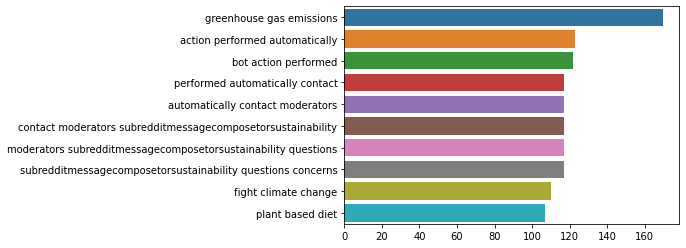

In [66]:
plot_top_ngrams_barchart(df1["final"],3)

# Topic modeling exploration

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.

But before getting into topic modeling we have to pre-process our data a little. We will:

- tokenize: the process by which sentences are converted to a list of tokens or words.
- remove stopwords
- lemmatize: reduces the inflectional forms of each word into a common base or root.
- convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus.

In [67]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize

In [69]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    return lda_model, bow_corpus, dic

In [70]:
lda_model, bow_corpus, dic = get_lda_objects(df1["final"])

[nltk_data] Downloading package stopwords to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
lda_model.show_topics()

[(0,
  '0.013*"meat" + 0.013*"food" + 0.012*"animal" + 0.009*"vegan" + 0.008*"plant" + 0.007*"like" + 0.007*"eat" + 0.007*"land" + 0.006*"people" + 0.006*"water"'),
 (1,
  '0.015*"plastic" + 0.011*"use" + 0.011*"like" + 0.008*"buy" + 0.007*"good" + 0.007*"product" + 0.006*"waste" + 0.005*"year" + 0.005*"thing" + 0.005*"sustainable"'),
 (2,
  '0.018*"people" + 0.010*"like" + 0.009*"change" + 0.009*"think" + 0.007*"thing" + 0.007*"need" + 0.007*"sustainability" + 0.006*"way" + 0.006*"good" + 0.005*"sustainable"'),
 (3,
  '0.019*"energy" + 0.017*"carbon" + 0.011*"emission" + 0.010*"fuel" + 0.007*"fossil" + 0.007*"power" + 0.006*"solar" + 0.006*"year" + 0.006*"car" + 0.005*"cost"')]

### Wordcloud

Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

Creating wordcloud in python with is easy but we need the data in a form of a corpus. Luckily, I prepared it in the previous section.

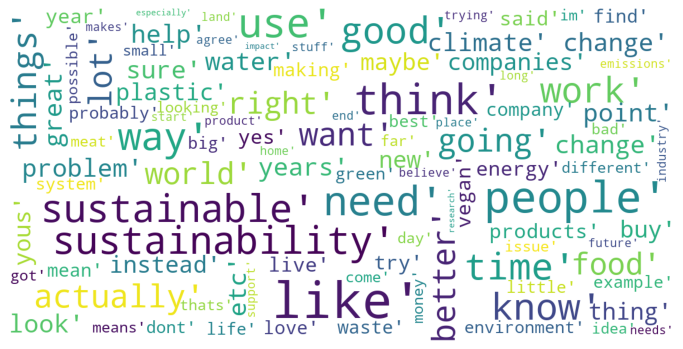

In [72]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [73]:
new

[['americas',
  'new',
  'drinking',
  'problem',
  'trump',
  'administration',
  'rolls',
  'clean',
  'water',
  'act',
  'nnnnpresident',
  'trumps',
  'epa',
  'restricted',
  'bodies',
  'water',
  'federal',
  'government',
  'regulate',
  'territorial',
  'seas',
  'traditional',
  'navigable',
  'waters',
  'perennial',
  'intermittent',
  'tributaries',
  'waters',
  'certain',
  'lakes',
  'ponds',
  'impoundments',
  'wetlands',
  'adjacent',
  'jurisdictional',
  'waters',
  'unfortunately',
  'means',
  'federal',
  'government',
  'longer',
  'enforcing',
  'laws',
  'waters',
  'including',
  'groundwater',
  'wetlands',
  'adjacent',
  'large',
  'bodies',
  'water',
  'seasonal',
  'streams',
  'flow',
  'portion',
  'year',
  'ephemeral',
  'streams',
  'flow',
  'rainstorms',
  'heres',
  'means'],
 ['trumps',
  'gutting',
  'environmental',
  'rules',
  'pushing',
  'dark',
  'days',
  'ignorance',
  'eco',
  'planet',
  'news'],
 ['greta',
  'thunberg',
  'brushes

In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [80]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.04 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.04 :
        print("Negative")
 
    else :
        print("Neutral")

In [82]:
# Driver code
if __name__ == "__main__" :
 
    print("\n1st statement :")
    sentence = 'ISIS slaughtered 1000 innocent people'
 
    # function calling
    sentiment_scores(sentence)
 
    print("\n2nd Statement :")
    sentence = '100 people killed in Iraq'
    sentiment_scores(sentence)
 
    print("\n3rd Statement :")
    sentence = 'Nothing is better than a sunny day '
    sentiment_scores(sentence)


1st statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.34}
sentence was rated as  0.0 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  37.5 % Positive
Sentence Overall Rated As Positive

2nd Statement :
Overall sentiment dictionary is :  {'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.6705}
sentence was rated as  52.900000000000006 % Negative
sentence was rated as  47.099999999999994 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

3rd Statement :
Overall sentiment dictionary is :  {'neg': 0.236, 'neu': 0.49, 'pos': 0.274, 'compound': 0.1012}
sentence was rated as  23.599999999999998 % Negative
sentence was rated as  49.0 % Neutral
sentence was rated as  27.400000000000002 % Positive
Sentence Overall Rated As Positive


In [88]:
 sentiment_scores("Islamic State militants killed 11 Iraqi soldiers sleeping in their camp while\
 dozens died after its fighters launched a prison break attempt in Syria, indicating how the extremist group remains\
 a potent threat despite its territorial defeat in the region.The attacks late Thursday and early Friday resulted\
 in the worst day of Islamic State-related violence in a year and demonstrated the group’s enduring reach as an\
 insurgency that operates in secret while carrying out deadly shootings and bombings.")

Overall sentiment dictionary is :  {'neg': 0.285, 'neu': 0.662, 'pos': 0.053, 'compound': -0.9751}
sentence was rated as  28.499999999999996 % Negative
sentence was rated as  66.2 % Neutral
sentence was rated as  5.3 % Positive
Sentence Overall Rated As Negative


In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_score(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.04 :
        sentence = "Positive"
 
    elif sentiment_dict['compound'] <= - 0.04 :
        sentence ="Negative"
 
    else :
        sentence ="Neutral"

In [93]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [96]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

In [97]:
df1["polarity"]=df1["final"].map(lambda x: get_vader_score(x))

In [99]:
df1["polarity"] = df1["polarity"].replace({0:'neg',1:'neu',2:'pos'})

In [101]:
df1["polarity_score"]=df1["final"].map(lambda x: get_vader_score(x))

In [102]:
df1.head()

,id,final,polarity,polarity_score
0,etfi0m,americas new drinking problem trump administra...,neu,1
1,etouq6,trumps gutting environmental rules pushing dar...,neu,1
2,etp02h,greta thunberg brushes mockery yous finance ch...,neu,1
3,etpv53,crisis change guardian language changes climat...,neu,1
4,etsaxl,future worse thought,neg,0


<BarContainer object of 3 artists>

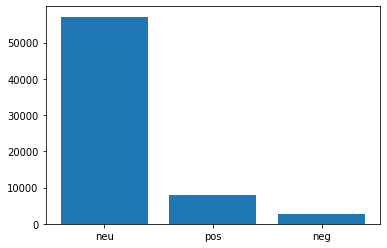

In [103]:
polarity=df1['polarity']
plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# Named entity recognition

Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

There are three standard libraries to do Named Entity Recognition:

- Standford NER
- spaCy
- NLTK

In this tutorial, I will use spaCy which is an open-source library for advanced natural language processing tasks. It is written in Cython and is known for its industrial applications. Besides NER, spaCy provides many other functionalities like pos tagging, word to vector transformation, etc.

There are three pre-trained models for English in spaCy. I will use en_core_web_sm for our task but you can try other models.

In [104]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [105]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [106]:
ent=df1["final"].apply(lambda x : ner(x))

ent=[x for sub in ent for x in sub]

In [107]:
counter=Counter(ent)
count=counter.most_common()

<AxesSubplot:>

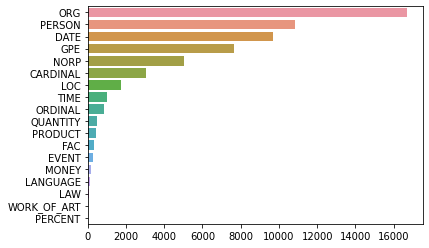

In [108]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

**Now we can see that the PERSON and ORG dominate the news headlines followed by the DATE and GPE entity.**

We can also visualize the most common tokens per entity. Let’s check which places appear the most in news headlines.

### NER for Organizations

In [109]:
def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

In [110]:
org=df1["final"].apply(lambda x: ner(x))
org=[i for x in org for i in x]
counter=Counter(org)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

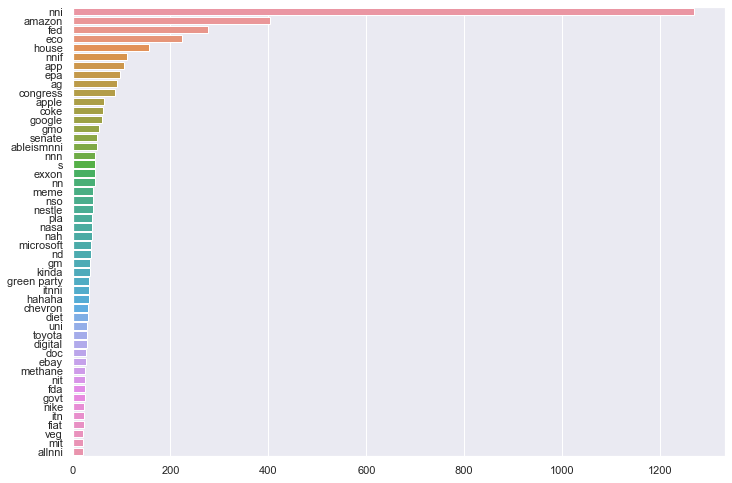

In [111]:
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [137]:
org = [i for i in org if i != "nni"]
org = [i for i in org if i != "nnif"]
org = [i for i in org if i != "ableismnni"]
org = [i for i in org if i != "nn"]
org = [i for i in org if i != "nnn"]
org = [i for i in org if i != "hahaha"]
org = [i for i in org if i != "itnni"]
org = [i for i in org if i != "allnni"]
org = [i for i in org if i != "meme"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

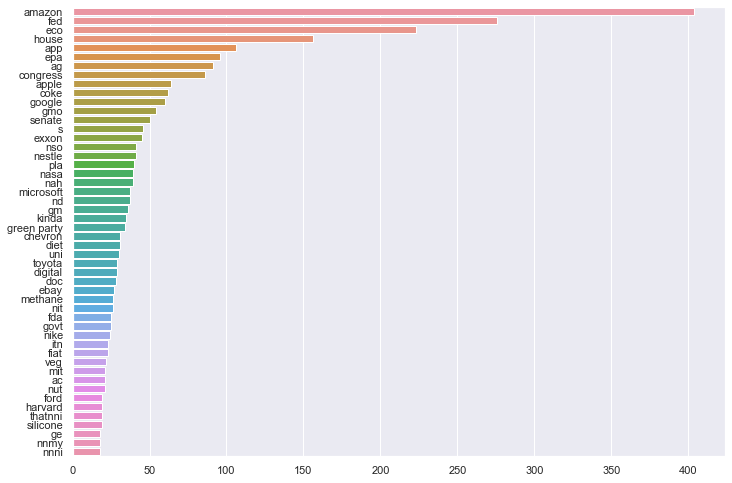

In [138]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [139]:
org = [i for i in org if i != "thatnni"]
org = [i for i in org if i != "kinda"]
org = [i for i in org if i != "s"]
org = [i for i in org if i != "nnni"]
org = [i for i in org if i != "nnmy"]
org = [i for i in org if i != "nut"]
org = [i for i in org if i != "nah"]
org = [i for i in org if i != "itn"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

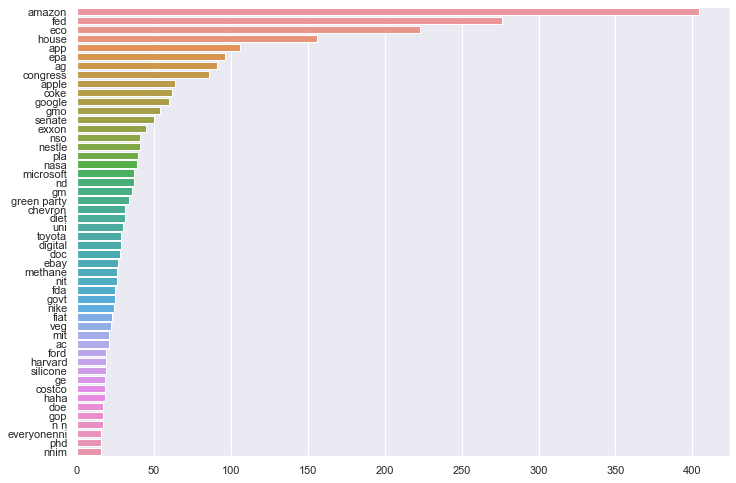

In [140]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [141]:
org = [i for i in org if i != "haha"]
org = [i for i in org if i != "n n"]
org = [i for i in org if i != "phd"]
org = [i for i in org if i != "everyonenni"]
org = [i for i in org if i != "nnim"]
org = [i for i in org if i != "digital"]
org = [i for i in org if i != "house"]
org = [i for i in org if i != "eco"]
org = [i for i in org if i != "congress"]
org = [i for i in org if i != "senate"]
org = [i for i in org if i != "methane"]
org = [i for i in org if i != "pla"]
org = [i for i in org if i != "uni"]
org = [i for i in org if i != "fda"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

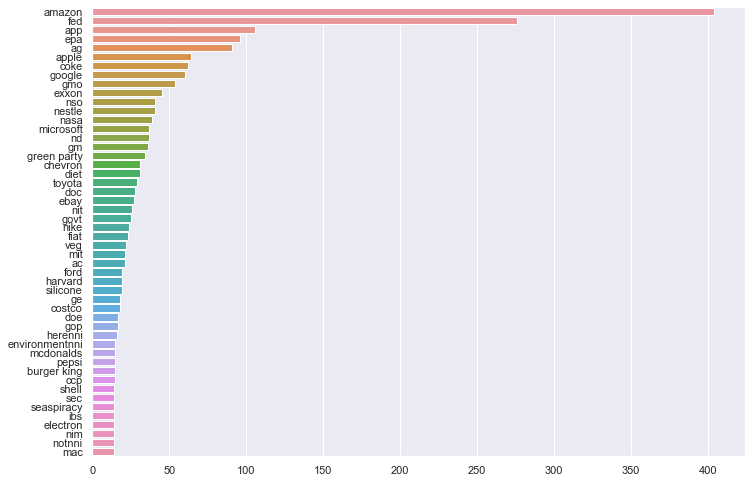

In [142]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

### NER for Person

In [143]:
person=df1["final"].apply(lambda x: ner(x,"PERSON"))
person=[i for x in person for i in x]
counter=Counter(person)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

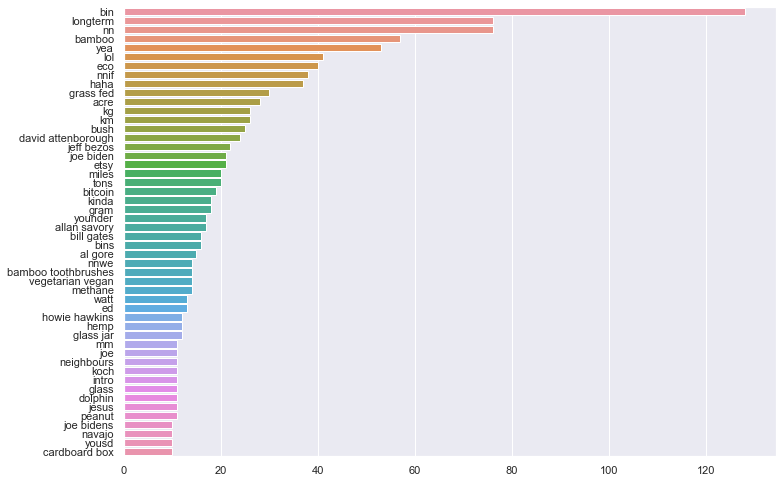

In [144]:
x,y=map(list,zip(*counter.most_common(50)))
sns.barplot(y,x)

In [145]:
person = [i for i in person if i != "longterm"]
person = [i for i in person if i != "nn"]
person = [i for i in person if i != "yea"]
person = [i for i in person if i != "lol"]
person = [i for i in person if i != "eco"]
person = [i for i in person if i != "nnif"]
person = [i for i in person if i != "haha"]
person = [i for i in person if i != "km"]
person = [i for i in person if i != "kg"]
person = [i for i in person if i != "bush"]
person = [i for i in person if i != "kinda"]
person = [i for i in person if i != "gram"]
person = [i for i in person if i != "nnwe"]
person = [i for i in person if i != "mm"]
person = [i for i in person if i != "methane"]
person = [i for i in person if i != "bamboo"]
person = [i for i in person if i != "bamboo toothbrushes"]
person = [i for i in person if i != "watt"]
person = [i for i in person if i != "vegetarian vegan"]
person = [i for i in person if i != "glass jar"]
person = [i for i in person if i != "neighbors"]
person = [i for i in person if i != "intro"]
person = [i for i in person if i != "peanut"]
person = [i for i in person if i != "longterm"]
person = [i for i in person if i != "cardboard box"]
person = [i for i in person if i != "longterm"]


C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

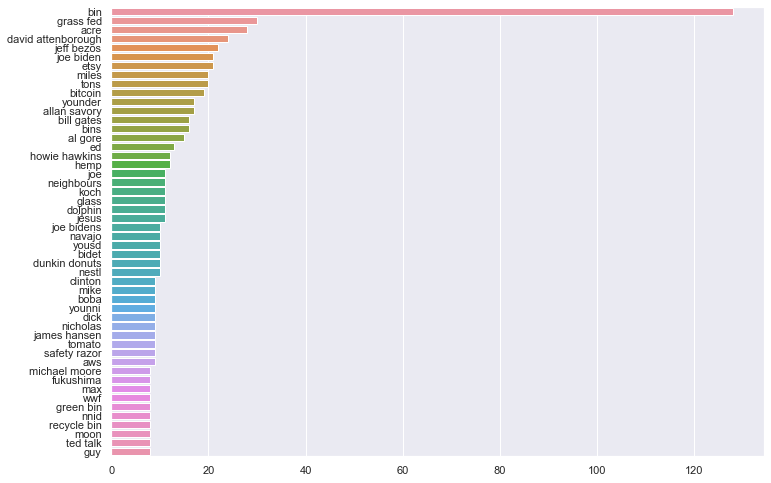

In [146]:
counter=Counter(person)
x,y=map(list,zip(*counter.most_common(50)))
sns.barplot(y,x)

In [147]:
person = [i for i in person if i != "bin"]
person = [i for i in person if i != "grass fed"]
person = [i for i in person if i != "acre"]
person = [i for i in person if i != "tons"]
person = [i for i in person if i != "bins"]
person = [i for i in person if i != "hemp"]
person = [i for i in person if i != "neighbours"]
person = [i for i in person if i != "glass"]
person = [i for i in person if i != "yousd"]
person = [i for i in person if i != "tomato"]
person = [i for i in person if i != "safety razor"]
person = [i for i in person if i != "max"]
person = [i for i in person if i != "wwf"]
person = [i for i in person if i != "green bin"]
person = [i for i in person if i != "nnid"]
person = [i for i in person if i != "recycle bin"]
person = [i for i in person if i != "guy"]
person = [i for i in person if i != "moon"]
person = [i for i in person if i != "bidet"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

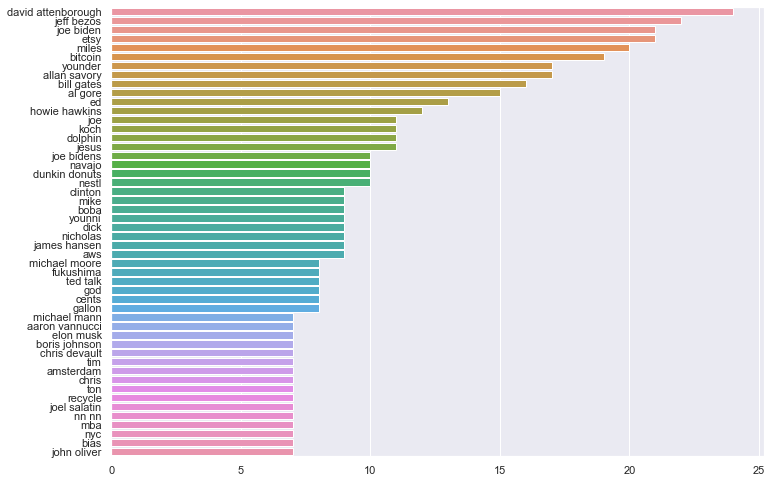

In [148]:
counter=Counter(person)
x,y=map(list,zip(*counter.most_common(50)))
sns.barplot(y,x)

### NER for Geography

In [149]:
gpe=df1["final"].apply(lambda x: ner(x,"GPE"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

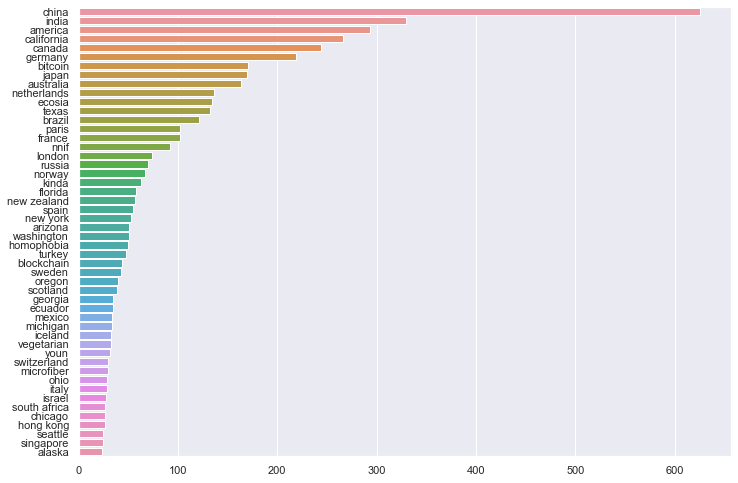

In [150]:
x,y=map(list,zip(*counter.most_common(50)))
sns.barplot(y,x)

In [151]:
gpe = [i for i in gpe if i != "bitcoin"]
gpe = [i for i in gpe if i != "ecosia"]
gpe = [i for i in gpe if i != "nnif"]
gpe = [i for i in gpe if i != "kinda"]
gpe = [i for i in gpe if i != "homophobia"]
gpe = [i for i in gpe if i != "blockchain"]
gpe = [i for i in gpe if i != "vegetarian"]
gpe = [i for i in gpe if i != "youn"]
gpe = [i for i in gpe if i != "microfiber"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

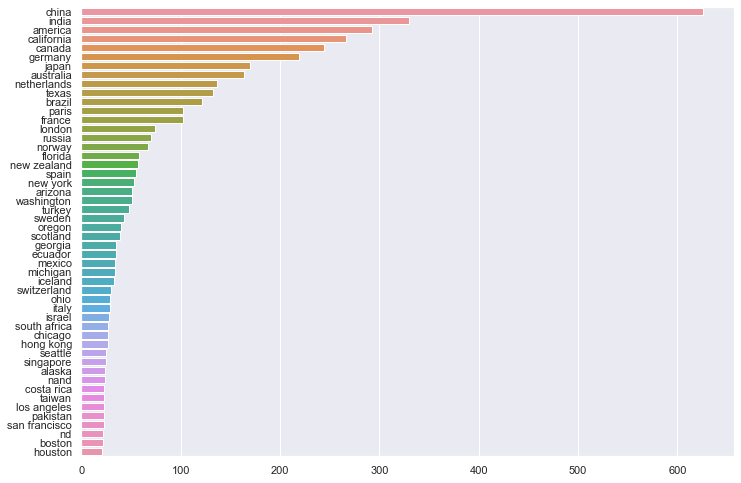

In [152]:
counter=Counter(gpe)
x,y=map(list,zip(*counter.most_common(50)))
sns.barplot(y,x)